In [2]:
# import packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline

# import pre-processing modules 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel 

# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# import evaluation modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [3]:
test_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/test.csv")
train_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/train.csv")
df_original = pd.concat([train_set,test_set], axis=0, ignore_index=True )


In [4]:
df_train = (train_set.copy()).rename(columns=str.lower)
df_test = (test_set.copy()).rename(columns=str.lower)
df = (df_original.copy()).rename(columns=str.lower)


#df
#df_test.info()

# functions

In [5]:
# for now I only need title , later ill add the family names index functionality
def parce_name(df):
        # find index by names 
    names = list(df['name'])
    fam_name = [(item.split(',')[0]) for item in names]
    temp = [(item.split(',')[1]) for item in names]
    title = [(item.split('.')[0])for item in temp]
    return title, fam_name

# age nans

In [6]:
# work on df nan and then concat with original df_train and sort by ID

age_nan = df_train[df_train['age'].isna()]
#age_nan.info()
age_nan = age_nan.sort_values(by=['sex'],ascending=True)
age_nan = age_nan.sort_values(by=['sibsp'],ascending=False).reset_index(drop=True)

# assign the masters the average age under 12 . becasue older than 12 are mrs.
title, fam_nam = parce_name(age_nan)
master_index = []
for i in range(len(age_nan)):
    if title[i] == ' Master':
        master_index.append(i)

df_young = df_train[df_train["age"] < 12 ]
child_mean = df_young['age'].mean()
       
for i in master_index:
    age_nan.at[i,'age'] = child_mean 
    
# age nan with no siblings and spuses . so determine average age by gender . 











In [7]:
# age nan with no siblings and spouses . so determine average age by gender . 
l_p_t = age_nan[age_nan['sibsp'] == 0]
len(l_p_t)
lone_pass = l_p_t[l_p_t['parch'] == 0] # passengers who travel alone and cant determine their age by relatives
lone_pass


# calc mean by gender
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']
male_mean = df_male['age'].mean()
female_mean = df_female['age'].mean()

lone_pass_male = lone_pass[lone_pass['sex'] == 'male']
lone_pass_female = lone_pass[lone_pass['sex'] == 'female']
l_p_m_index = (lone_pass_male.index).to_numpy()
l_p_f_index = (lone_pass_female.index).to_numpy()

for m in l_p_m_index:
    df.at[m,'age'] = male_mean

for f in l_p_f_index:
    df.at[i,'age'] = female_mean
    
age_nan = df[df['age'].isna()] # update the age_nan
age_nan

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#pd.set_option('display.max_rows', len(age_nan))
#print(age_nan)
#pd.reset_option('display.max_rows')
#age_nan.head(60)



In [9]:
## look at the passengers with sibsp or parch

In [10]:
# find male and female age distribution
df_male = (df[df['sex'] == 'male'])
df_female = (df[df['sex'] == 'female'])

age_male = df_male["age"].to_numpy()
age_female = df_female["age"].to_numpy()
#age_male
#age_female
age_male = age_male[~np.isnan(age_male)]
age_female = age_female[~np.isnan(age_female)]

w,p = stats.shapiro(age_male)
#w,p = stats.kstest(age_male, 'norm')
print(p)

# the result from the test is that it is not a normal distribution

2.0573258374678716e-10


<AxesSubplot: xlabel='sex', ylabel='count'>

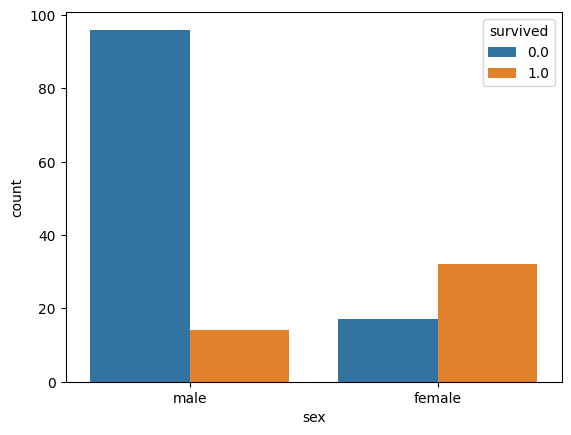

In [11]:
sns.countplot(data=age_nan, x="sex", hue="survived")

<AxesSubplot: xlabel='sibsp', ylabel='count'>

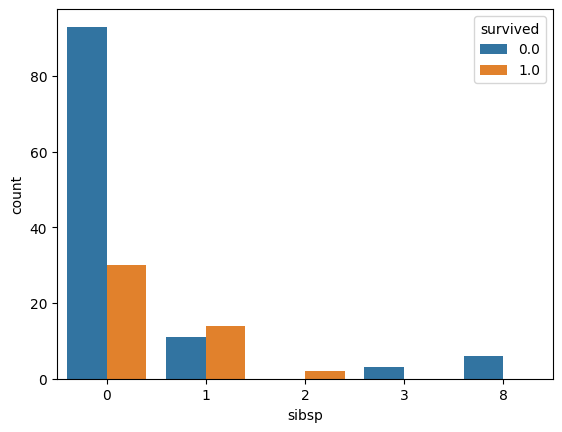

In [12]:
sns.countplot(data=age_nan, x="sibsp", hue="survived")

In [13]:
masters, fam_nam = parce_name(age_nan)
print(masters)

#master_nan = df_train[df_train["name"] == 'Master']
#master_nan

[' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Miss', ' Mr', ' Mr', ' Master', ' Mr', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Miss', ' Miss', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Miss', ' Master', ' Mr', ' Mr', ' Miss',

In [14]:
print(df.iloc[803,:]) #laubfer
print(df.iloc[995,:])
print(df.iloc[1007,:])
print(df.iloc[1024,:])
print(df.iloc[1223,:])




803
995
1007
1024
1223

print(df.iloc[186,:])# O'brien
print(df.iloc[364,:])
print(df.iloc[552,:])

print(df.iloc[31,:])# zabour - two sisters 
print(df.iloc[1207,:])



print(df.iloc[111,:])# zabour - two sisters 
print(df.iloc[240,:])



print(df.iloc[5,:]) # moran two brothers and another one dont relate to 
print(df.iloc[109,:])
print(df.iloc[768,:])



print(df.iloc[176,:]) #laubfer
print(df.iloc[229,:])
print(df.iloc[409,:])
print(df.iloc[485,:])
print(df.iloc[1023,:])



print(df.iloc[159,:]) # Sage 
print(df.iloc[180,:])
print(df.iloc[201,:])
print(df.iloc[324,:])
print(df.iloc[792,:])
print(df.iloc[846,:])
print(df.iloc[863,:])
print(df.iloc[1079,:])
print(df.iloc[1233,:])
print(df.iloc[1251,:])
print(df.iloc[1256,:])



#print(df.iloc[339,:]) # Johnsnton
#print(df.iloc[172,:])
#print(df.iloc[302,:])
#print(df.iloc[597,:])
#print(df.iloc[719,:])
#print(df.iloc[869,:])



#print(df.iloc[7,:])
#print(df.iloc[24,:])
#print(df.iloc[374,:])
#print(df.iloc[567,:])
#print(df.iloc[1280,:])


passengerid                                804
survived                                   1.0
pclass                                       3
name           Thomas, Master. Assad Alexander
sex                                       male
age                                       0.42
sibsp                                        0
parch                                        1
ticket                                    2625
fare                                    8.5167
cabin                                      NaN
embarked                                     C
Name: 803, dtype: object
passengerid                                          996
survived                                             NaN
pclass                                                 3
name           Thomas, Mrs. Alexander (Thamine Thelma")"
sex                                               female
age                                                 16.0
sibsp                                                  1
parch       

In [15]:
#johnston = df_train[df_train["ticket"] == '1601']
#johnston

In [16]:
print(df.iloc[339,:]) # Johnsnton
print(df.iloc[172,:])
print(df.iloc[302,:])
print(df.iloc[597,:])
print(df.iloc[719,:])
print(df.iloc[869,:])

passengerid                             340
survived                                0.0
pclass                                    1
name           Blackwell, Mr. Stephen Weart
sex                                    male
age                                    45.0
sibsp                                     0
parch                                     0
ticket                               113784
fare                                   35.5
cabin                                     T
embarked                                  S
Name: 339, dtype: object
passengerid                             173
survived                                1.0
pclass                                    3
name           Johnson, Miss. Eleanor Ileen
sex                                  female
age                               30.585228
sibsp                                     1
parch                                     1
ticket                               347742
fare                                11.1333
cabin  

In [17]:
# find index by names 
names = list(df['name'])
fam_name = [(item.split(',')[0]) for item in names]
for i in range(len(fam_name)):
    if fam_name[i] == "Thomas":
        print(i)    

803
995
1007
1024
1223


In [18]:
#df_cabin = df_train.sort_values(by=['cabin'],ascending=True)
#df_cabin.head(204)

In [19]:
#df_live = df_train[df_train["survived"] == 1]
#df_live.head(10)

In [20]:
#df_male = df_train[df_train['sex'] == 'male']
df_young = df_train[df_train["age"] < 12 ]
child_mean = df_young['age'].mean()

#df_young.sort_values(by=['age'],ascending=True)


In [21]:
#sns.barplot(data=df_train, x="survived", y="pclass",  errorbar="sd")
 #sns.barplot(x="pclass", y="age", hue="survived", data=df_train)

## class plot

<AxesSubplot: xlabel='survived', ylabel='count'>

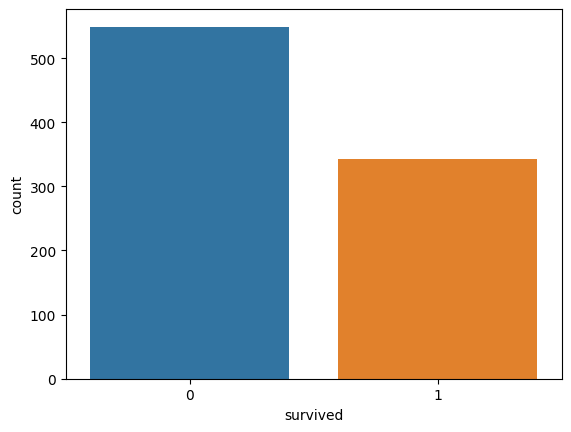

In [22]:
sns.countplot(data=df_train, x="survived")

## fare plot

<AxesSubplot: xlabel='survived', ylabel='count'>

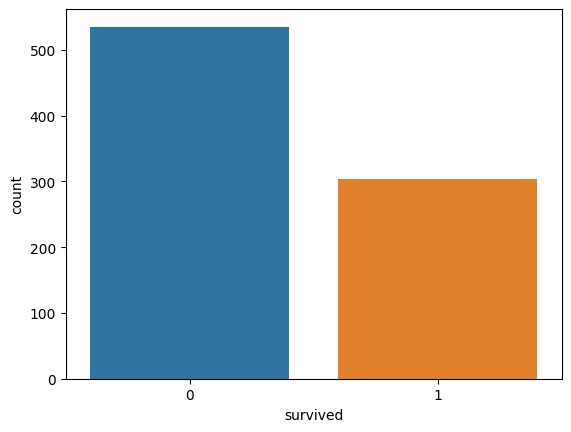

In [181]:
# I want to look who survived for fare greater than 100 
fare_100 = df_train[df_train["fare"] < 100]
sns.countplot(data=fare_100, x="survived")


<AxesSubplot: xlabel='age', ylabel='Count'>

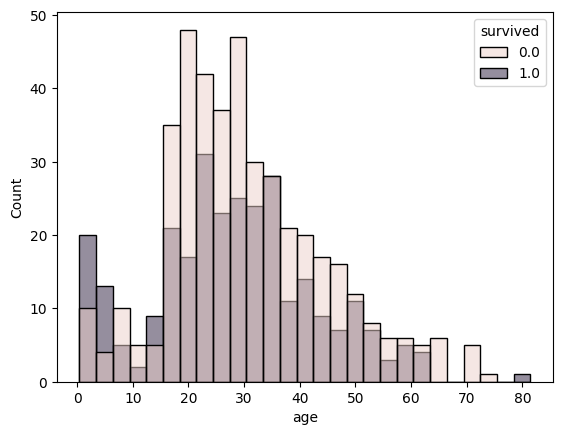

In [5]:
sns.histplot(data=df, x="age", binwidth=3, hue='survived')

## age plot

<AxesSubplot: xlabel='age', ylabel='Count'>

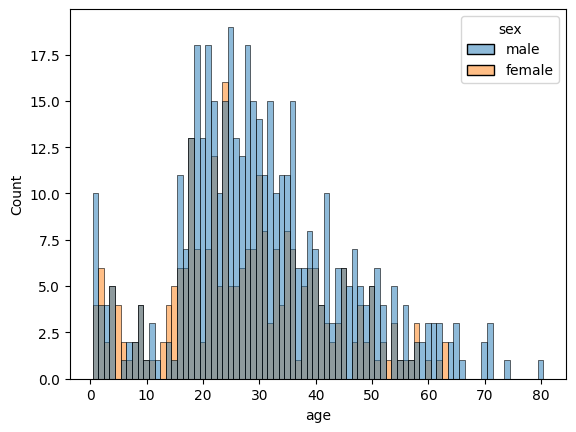

In [6]:
sns.histplot(data = df_train , x="age", binwidth=1 ,hue='sex')

<AxesSubplot: xlabel='survived', ylabel='age'>

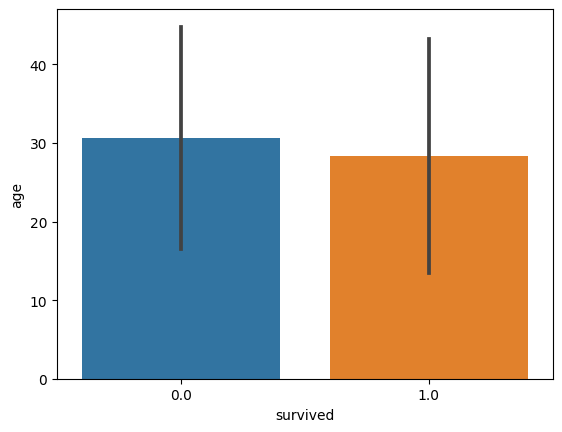

In [347]:
sns.barplot(data=df, x='survived', y='age', errorbar="sd")

## sex plot 

<AxesSubplot: xlabel='sex', ylabel='count'>

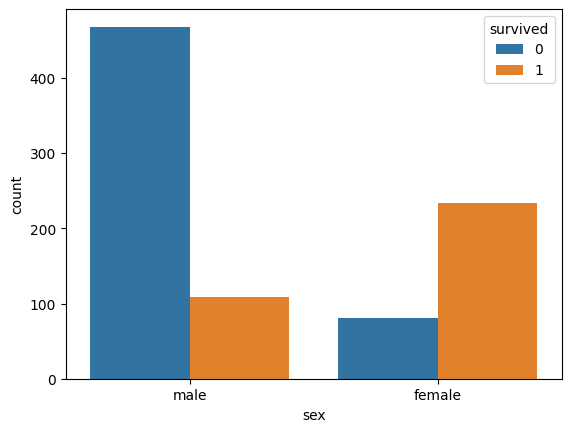

In [202]:
sns.countplot(data=df_train, x="sex", hue='survived')

## embarkation 

<AxesSubplot: xlabel='embarked', ylabel='count'>

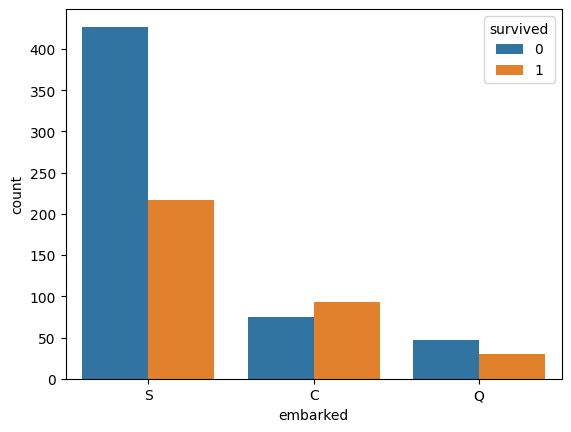

In [255]:
sns.countplot(data=df_train, x="embarked", hue='survived')

<AxesSubplot: xlabel='pclass', ylabel='count'>

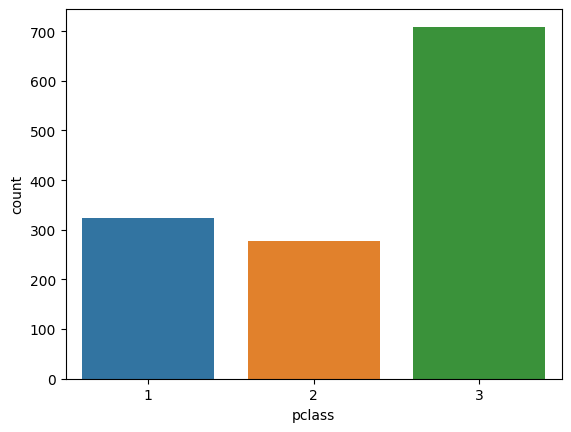

In [50]:
sns.countplot(data=df, x="pclass")